In [1]:
import os, sys

notebook_dir = os.getcwd()

#add path
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [2]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.data_loader import load_stock_data
from scripts.data_analysis import calculate_moving_average
from scripts.preprocessing_and_EDA import test_user_behavior
from scripts.load_SQL_data import load_data_from_postgres, load_data_using_sqlalchemy
from scripts.sql_queries import execute_telecom_queries


In [3]:
#define the query
query = "SELECT * FROM xdr_data;"

#pass the query to the function
data = load_data_from_postgres(query)

if data is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load the data")

c:\Users\pc\Desktop\10_Academy\Week-2\kaim-week-2\scripts\load_SQL_data.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [4]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [4]:
# Load environment variables from .env file
load_dotenv()

# Access the variables
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_name = os.getenv('DB_NAME')
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')

In [5]:
connection_string = f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"


In [6]:
#call sql query function
results = execute_telecom_queries(connection_string)

#print each result separately
for key, value in results.items():
    print(f"{key}:\n")

    #check if the result is a dataframe
    if isinstance(value, pd.DataFrame):
        print(value.to_string(index=False))
    else:
        print(value)
    
    print("\n" + "="*40 + "\n")

unique_imsi_cont:

 unique_imsi_count
            107265


average_duration:

 average_duration
    104608.560347


total_data_usage:

        IMSI  total_ul_bytes  total_dl_bytes
         NaN    2.350613e+10    2.580162e+11
2.082017e+14    6.894830e+08    8.156743e+09
2.082021e+14    7.034786e+08    7.811295e+09
2.082010e+14    7.295774e+08    7.770043e+09
2.082010e+14    5.815688e+08    7.309542e+09
2.082014e+14    6.696507e+08    7.301517e+09
2.082019e+14    6.242603e+08    7.081602e+09
2.082014e+14    4.050610e+08    6.903440e+09
2.082003e+14    5.215189e+08    6.610852e+09
2.082017e+14    4.712445e+08    6.400774e+09


avg_rtt_by_location:

   Last Location Name  avg_rtt_dl
              T10450C 6314.714286
9.16456699821824E+015 6128.888889
              D19121A 5553.166667
              L88381B 1851.727273
              T11119B  777.714286
              D16786A  673.466667
              D74535C  636.722222
                 None  600.721936
              D29838A  568.300000
      

In [7]:
data.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

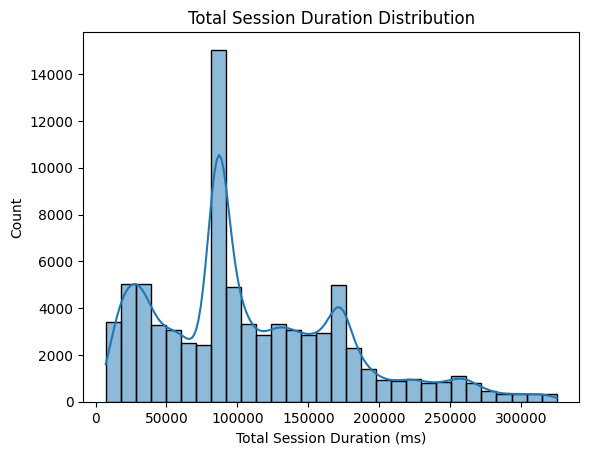

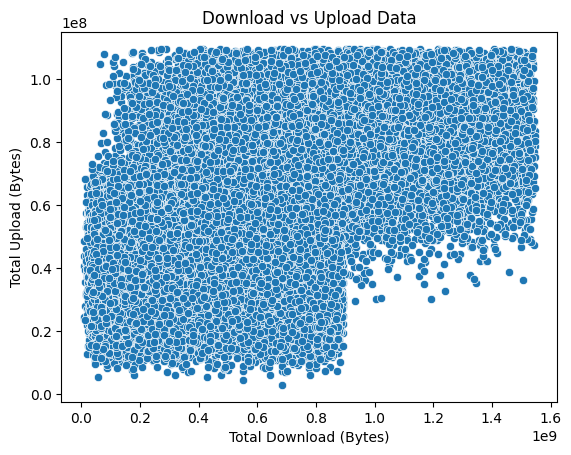

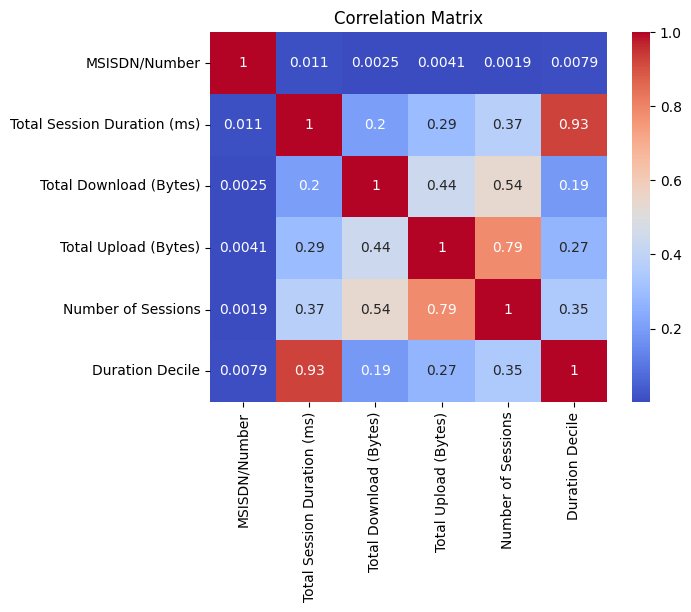

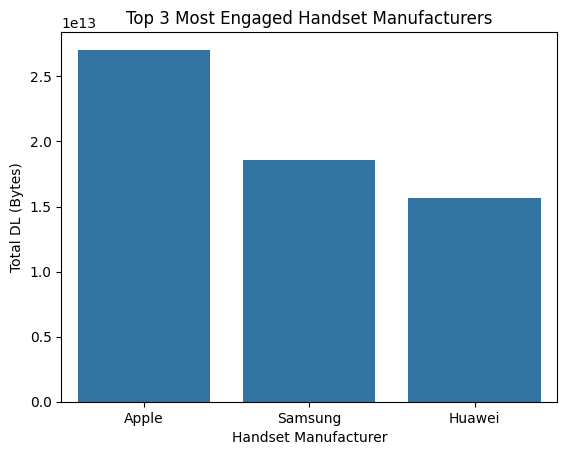

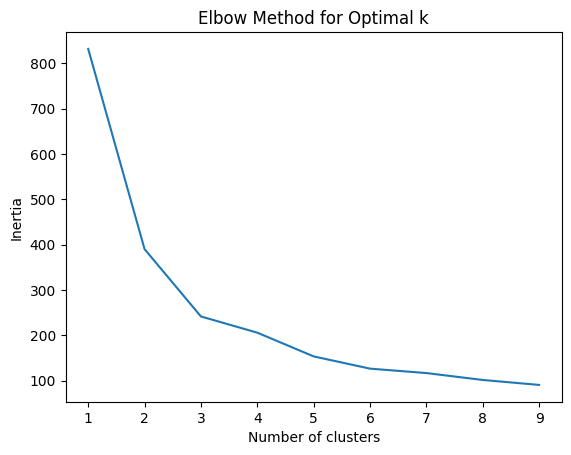

In [9]:
# stock_data = load_stock_data(data)
# stock_data.head(5)

# Calculates the moving average
# stock_data["Moving Average"] = calculate_moving_average(stock_data["Avg Bearer TP UL (kbps)"], window=5)
# plot_stock_data(stock_data)
test_user_behavior(data)

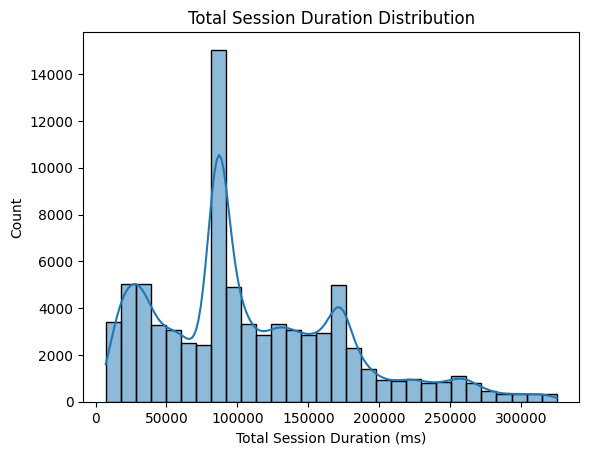

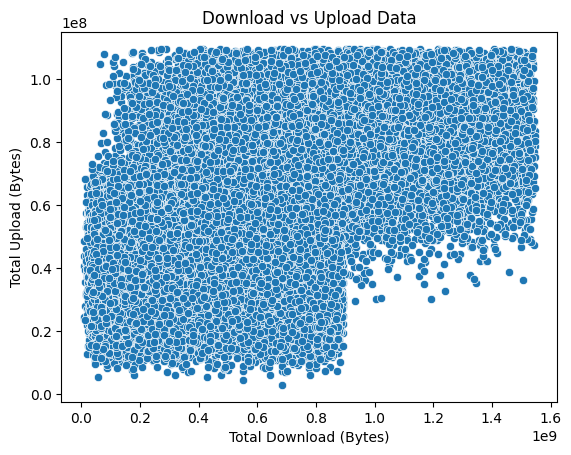

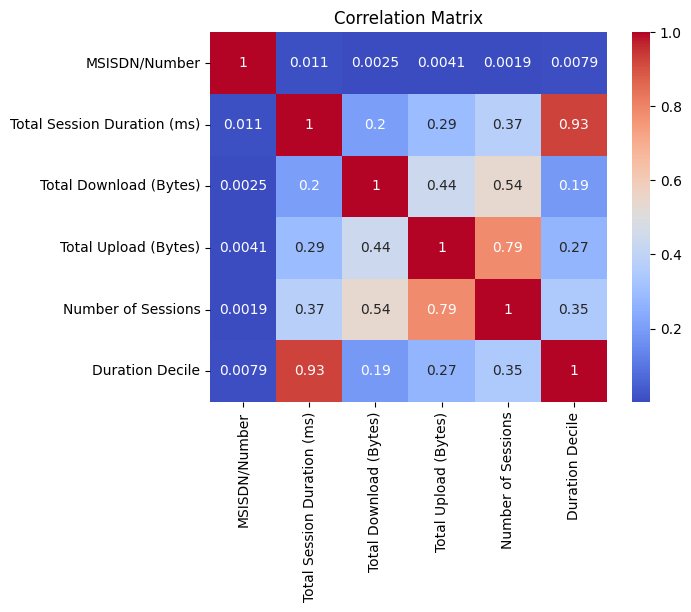

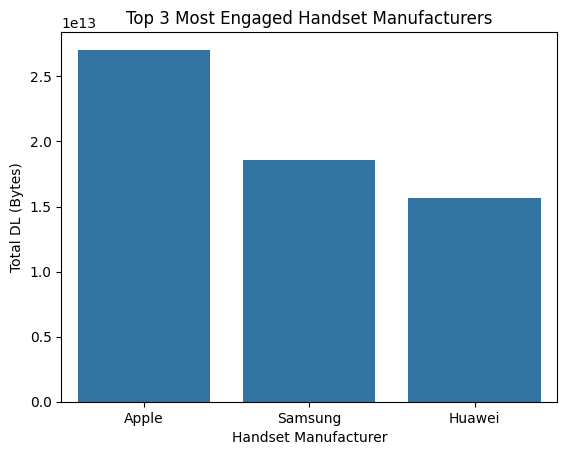

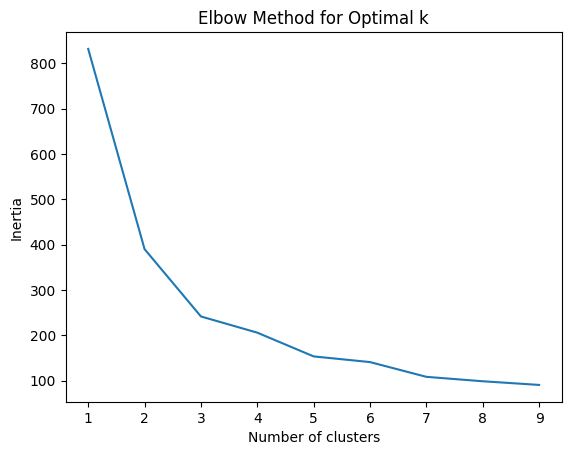

In [3]:

stock_data = load_stock_data("../../Data/Copy of Week2_challenge_data_source(CSV).csv")
stock_data.head(5)

# Calculates the moving average
# stock_data["Moving Average"] = calculate_moving_average(stock_data["Avg Bearer TP UL (kbps)"], window=5)
# plot_stock_data(stock_data)
test_user_behavior(stock_data)

In [4]:
from scripts.load_SQL_data import load_data_using_sqlalchemy
# from experience_satisfaction_analysis import connect_to_db
from scripts.experience_satisfaction_analysis import experience_analytics
from scripts.experience_satisfaction_analysis import compute_top_bottom_frequent
from scripts.experience_satisfaction_analysis import distribution_by_handset
from scripts.experience_satisfaction_analysis import kmeans_clustering
from scripts.experience_satisfaction_analysis import calculate_satisfaction
from scripts.experience_satisfaction_analysis import assign_scores
from scripts.experience_satisfaction_analysis import regression_model
from scripts.experience_satisfaction_analysis import kmeans_on_scores
from scripts.experience_satisfaction_analysis import average_scores_per_cluster
# from experience_satisfaction_analysis import export_to_mysql


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


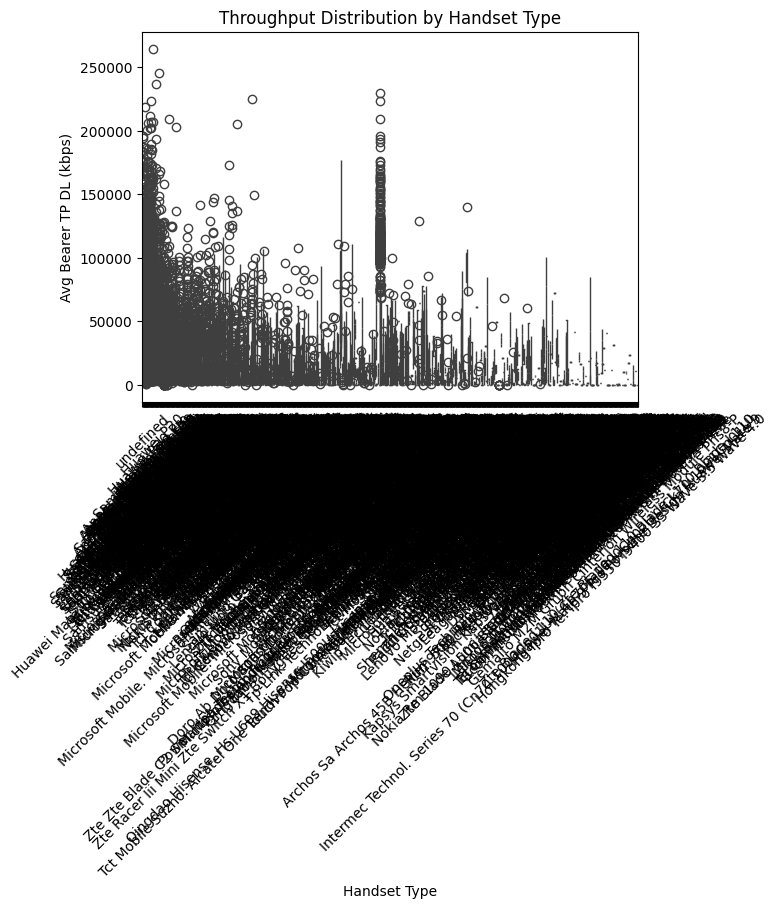

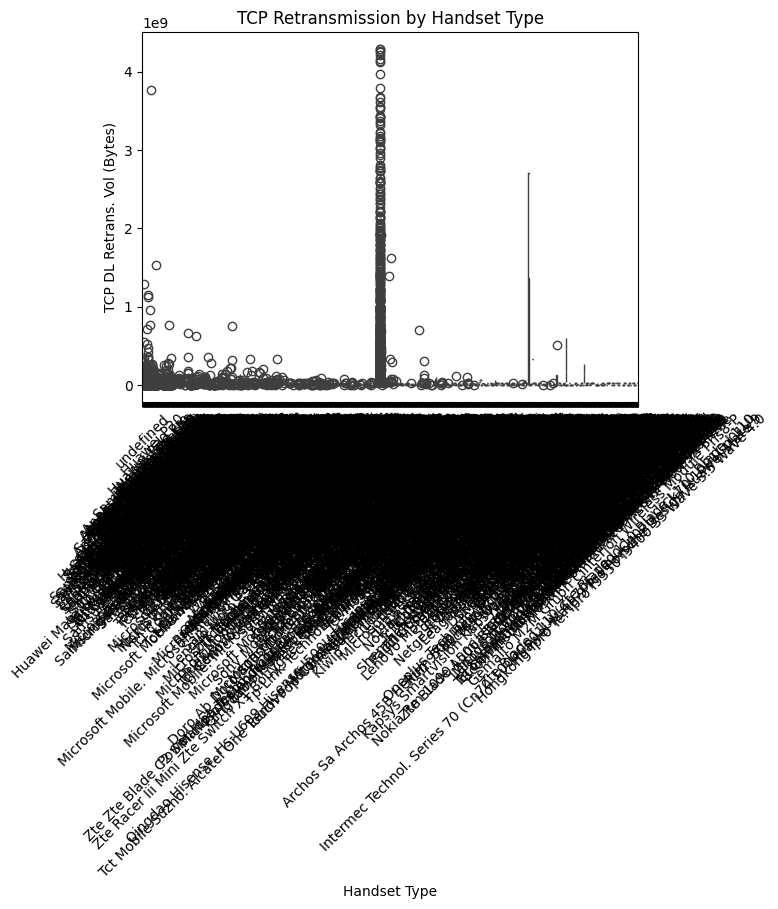

Throughput by Handset: Handset Type
A-Link Telecom I. Cubot A5                                                             23184.00000
A-Link Telecom I. Cubot Note Plus                                                       6527.00000
A-Link Telecom I. Cubot Note S                                                          8515.00000
A-Link Telecom I. Cubot Nova                                                           55667.00000
A-Link Telecom I. Cubot Power                                                          69126.00000
                                                                                          ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       44.50000
Zyxel Communicat. Lte7460                                                              39741.00000
Zyxel Communicat. Sbg3600                                                              82818.00000
Zyxel Communicat. Zyxel Wah7706                                          

In [ ]:
# engine = connect_to_db()
# data = pd.read_sql("SELECT * FROM xdr_data", engine)
# query = "SELECT * FROM xdr_data"
# data = load_data_using_sqlalchemy(query)

user_metrics = experience_analytics(data)
print("User Metrics:", user_metrics.head())

frequent_values = compute_top_bottom_frequent(user_metrics)
print("Frequent Values:", frequent_values)

throughput_by_handset, tcp_by_handset = distribution_by_handset(user_metrics)
print("Throughput by Handset:", throughput_by_handset)


In [ ]:
# clustered_metrics = kmeans_clustering(user_metrics)
# print("Clustered Metrics:", clustered_metrics.head())






In [ ]:
# # Assuming engagement_metrics is obtained from previous analysis
# engagement_metrics = pd.DataFrame()  # Replace with actual engagement data
# print("Engagement Metrics:", engagement_metrics.head())


In [ ]:
# user_metrics_with_scores = assign_scores(clustered_metrics, engagement_metrics)
# print("User Metrics with Scores:", user_metrics_with_scores.head())


In [ ]:
# top_satisfied_customers = calculate_satisfaction(user_metrics_with_scores)
# print("Top Satisfied Customers:", top_satisfied_customers)


In [ ]:
# regression_model(user_metrics_with_scores)
# clustered_scores = kmeans_on_scores(user_metrics_with_scores)
# average_cluster_scores = average_scores_per_cluster(clustered_scores)

In [ ]:
# export_to_mysql(clustered_scores)  # Uncomment this when ready